# **데이터시각화**
> 중간고사공부1

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "데이터시각화"]

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

# boxplot

>단순한 평균비교보다 분포를 비교해보는 것이 중요하다. 분포를 살펴보는 방법 중 유용한 방법이 박스플랏이다. 

> 함수 : 
>>import matplotlib.pyplot as plt
>>plt.boxplot()

In [3]:
y1=[75,75,76,76,77,77,79,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,80,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

In [4]:
np.mean(y1), np.mean(y2)

(79.1, 78.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ae2999040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ae2999700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ae298ec70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ae2999dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ae29a5190>],
 'means': []}

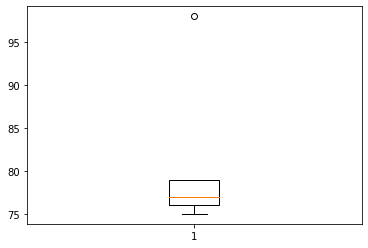

In [19]:
plt.boxplot(y1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ae51dec10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ae51ea310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ae51de8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3ae51ea9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ae51ead30>],
 'means': []}

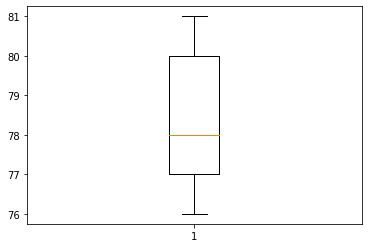

In [6]:
plt.boxplot(y2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ae5149670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ae5149d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ae5149310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3ae5153430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ae5153790>,
 'means': []}

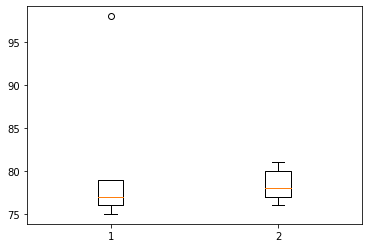

In [7]:
plt.boxplot([y1,y2]) # 나란히 그리기

박스플랏 설명 그림

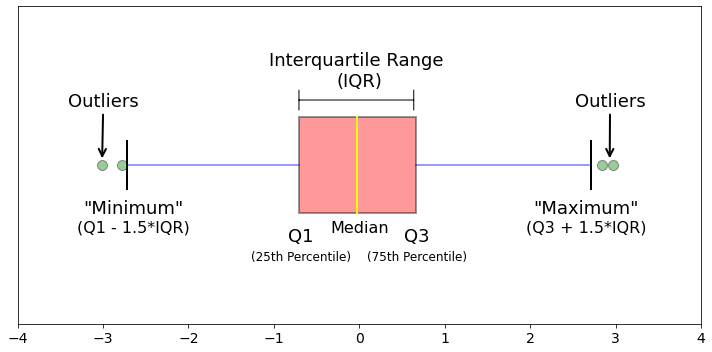

In [20]:
#collapse 
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

fig.tight_layout()

# plotly

> 그림(그래프)에 마우스를 올리면 상호작용하는 그림
>> plotly.express 와 pandas 필요

In [13]:
import plotly.express as px 
import pandas as pd
from IPython.display import HTML 

>박스플랏에서 구한 성적을 df로 구현.

>열에 A라는것을 y1 수(길이)만큼 배열

>pd.concat([df1,df2]) : 데이터프레임 합치기

>ignore_index=True -> 기존에 있던 인덱스를 무시해라
>> 0~9 / 0~9 (기존) -> 0~19 (무시)

In [21]:
A=pd.DataFrame({'score':y1,'class':['A']*len(y1)})
B=pd.DataFrame({'score':y2,'class':['B']*len(y2)})

In [22]:
df=pd.concat([A,B],ignore_index=True)

In [24]:
#hide
df

,score,class
0,75,A
1,75,A
2,76,A
3,76,A
4,77,A
5,77,A
6,79,A
7,79,A
8,79,A
9,98,A


>html 같은 경우 블로그에 올릴 때 유용하다. (포맷을 변환)

>반응형 플랏을 볼 수 있다. (마우스 올리면 값나옴,HTML형태로 그려진 그림)

In [25]:
fig=px.box(data_frame=df, x='class',y='score')

In [26]:
HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False))

# Histogram

>X축이 변수의 구간, Y축은 그 구간에 포함된 빈도를 의미하는 그림

> plt.hist() 함수 이용
>> np.random.normal() : 정규분포

>> loc:평균 , scale:표준편차 , size:표본수

(array([2.40000e+01, 1.21000e+03, 2.13380e+04, 1.39948e+05, 3.51614e+05,
        3.39662e+05, 1.27147e+05, 1.80510e+04, 9.87000e+02, 1.90000e+01]),
 array([-5.05590169, -4.03792348, -3.01994528, -2.00196708, -0.98398887,
         0.03398933,  1.05196753,  2.06994573,  3.08792394,  4.10590214,
         5.12388034]),
 <BarContainer object of 10 artists>)

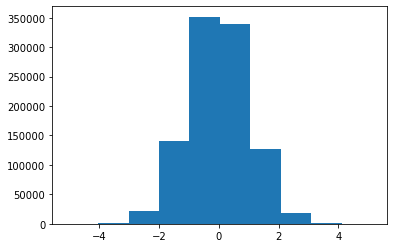

In [27]:
plt.hist(np.random.normal(loc=0, scale=1, size=1000000))

bins를 이용해 더 촘촘하게 그릴 수 있다. (정규분포에 더 가까워짐)

(array([2.0000e+00, 6.0000e+00, 1.6000e+01, 3.9000e+01, 6.1000e+01,
        1.3800e+02, 2.9000e+02, 5.0700e+02, 9.0400e+02, 1.6030e+03,
        2.6310e+03, 4.1220e+03, 6.4460e+03, 9.5500e+03, 1.3819e+04,
        1.9254e+04, 2.5638e+04, 3.3537e+04, 4.1336e+04, 4.9881e+04,
        5.8100e+04, 6.5370e+04, 7.0605e+04, 7.3583e+04, 7.4674e+04,
        7.2582e+04, 6.8887e+04, 6.2318e+04, 5.4823e+04, 4.6453e+04,
        3.8169e+04, 3.0141e+04, 2.3006e+04, 1.7010e+04, 1.2102e+04,
        8.3090e+03, 5.5450e+03, 3.4440e+03, 2.2440e+03, 1.2700e+03,
        7.4300e+02, 4.3200e+02, 2.1800e+02, 9.4000e+01, 5.4000e+01,
        1.9000e+01, 1.3000e+01, 5.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([-4.56309489, -4.37544858, -4.18780228, -4.00015598, -3.81250967,
        -3.62486337, -3.43721707, -3.24957076, -3.06192446, -2.87427816,
        -2.68663185, -2.49898555, -2.31133925, -2.12369294, -1.93604664,
        -1.74840034, -1.56075403, -1.37310773, -1.18546143, -0.99781512,
        -0.81016882, -0.62

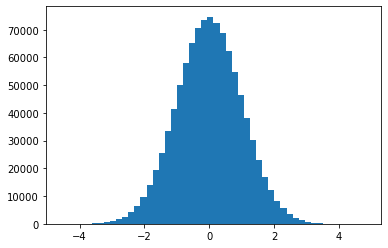

In [28]:
plt.hist(np.random.normal(loc=0, scale=1, size=1000000),bins=50)

__________________

>평균이 항상 좋은 중심경향값은 아니지만, 특수한 상황을 가정하면 평균이 좋은 중심경향값임 

In [29]:
np.random.seed(43052) #값이 안변하도록 시드설정
y1=np.random.normal(loc=0,scale=1,size=10000) #전북고 A반의 통계학 성적이라 생각하자. 
y2=np.random.normal(loc=0.5,scale=1,size=10000) #전북고 B반의 통계학 성적이라 생각하자. 

In [30]:
np.mean(y1), np.mean(y2) #np.mean:평균, 튜플로 나옴

(-0.011790879905079434, 0.4979147460611458)

In [32]:
(np.mean(y2)-np.mean(y1)).round(3) #소수 n째자리에서 반올림

0.51

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3ae27ac7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3ae27ace80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3ae27ac460>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3ae2737580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3ae27378e0>,
 'means': []}

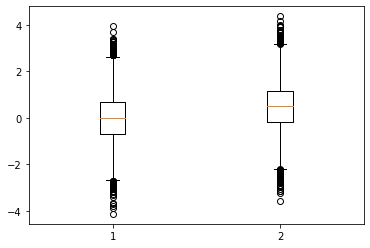

In [33]:
plt.boxplot([y1,y2])

>분포의 모양이 거의 일치하다고 할만큼 비슷하다.
>>$B반의 성적 \approx A반의 성적 + 0.51$
>라고 주장해도 큰 무리가 없음

>정규분포인지는 어떻게 알까? $\to$ 히스토그램 그려보기

plt.hist(y1,bins=50)

plt.hist(y2,bins=50)

plt.hist([y1,y2],bins=200) #같이 그리기

$\to$ 아웃풋이 너무 지저분하다.

### 새로운 패키지 이용

> R: ggplot2 가 대세

> Python:
>>matplotlib (매트랩 모방)

>>seaborn

>>plotnine (ggplot모방)

>>plotly   등등 많음

# seaborn

>깔끔하게 히스토그램을 그리는 패키지
>>df를 입력으로 받는다

In [37]:
import seaborn as sns 

In [38]:
A=pd.DataFrame({'score':y1,'class':['A']*len(y1)})
B=pd.DataFrame({'score':y2,'class':['B']*len(y2)})
df=pd.concat([A,B],ignore_index=True)

<AxesSubplot:xlabel='score', ylabel='Count'>

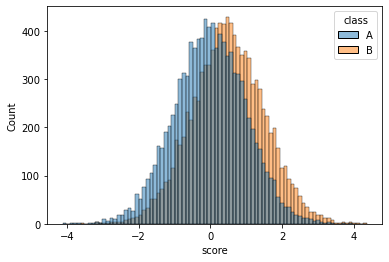

In [39]:
sns.histplot(df,x='score',hue='class')

# plotnine

>인터랙티브 그래프를 위해서 plotly 홈페이지를 방문하여 적당한 코드를 가져온다. 

In [40]:
from plotnine import *

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 84'. Pick better value with 'binwidth'.


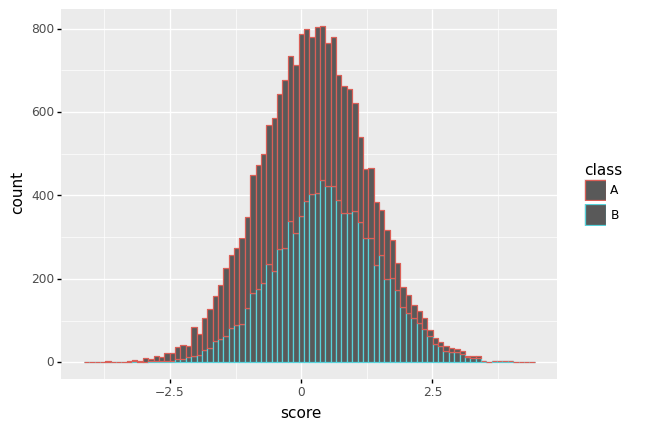

<ggplot: (8743170859795)>

In [45]:
ggplot(df)+geom_histogram(aes(x='score',color='class'))

$\to$ 별로 알아보기가 힘들다

color를fill로 바꿔줌 , position을 동등하게 , alpha: 투명도

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 84'. Pick better value with 'binwidth'.


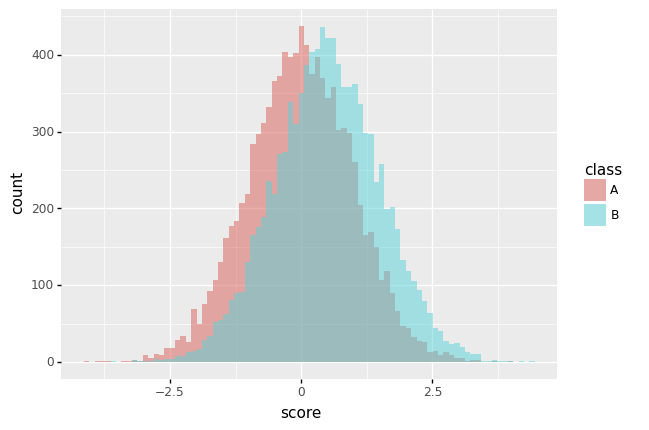

<ggplot: (8743171077340)>

In [41]:
ggplot(df)+geom_histogram(aes(x='score',fill='class'),position='identity',alpha=0.5)

# plotly 활용

>구글에 검색하면 예시가 잘 나와있다.

In [48]:
#collapse 
import plotly.figure_factory as ff
import numpy as np
hist_data=[y1,y2]
group_labels=['A','B']

fig = ff.create_distplot(hist_data, group_labels,
                         bin_size=.2, show_rug=False)
HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False))